# Task 1: Using Markdown Language:
---
**Jivraj Grewal:** *Task 1,* showing you how markdown language can manipulate the wayn things look on the file.

**[Click here to get rick rolled](https://www.youtube.com/watch?v=dQw4w9WgXcQ)**

# Task 4 EDA:

In [98]:
from project_functions import load_data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
print("\nUsing pandas")
df = pd.read_csv("../../data/raw/Medical_Cost.csv")
df.info()
df.describe().T
#or
print("\nUsing project_funtions")
df2 = load_data("../../data/raw/Medical_Cost.csv")
df2.info()
df2.describe().T


Using pandas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Using project_funtions
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 940 to 1241
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 no

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [91]:
#prelimnary processesing
#naming the identifier
df['age'] = df['age'].astype('str')

#naming the categorical data
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

#naming numeric data
df['bmi'] = df['bmi'].astype('float64')
df['children'] = df['children'].astype('int64')
df['charges'] = df['charges'].astype('float64')

#EDA begins
print("Showing number of unique values")
df.nunique(axis=0)

Showing number of unique values


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Scatterplot of BMI vs Costs
***Shows relationship between two variables and identifies outliers.*** In this scatter plot we can see there is a relationship between costs and bmi. What we can gather from this visualization is that there is some type of reltionship in that the higher the bmi gets the more the person will have to pay in medical bills. Also, there are some ouliers in the respective bmi columns 

<AxesSubplot:xlabel='bmi', ylabel='charges'>

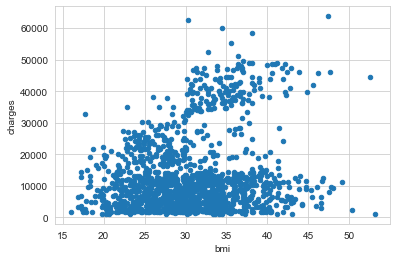

In [76]:
df.plot(kind='scatter', x='bmi', y='charges')

## Barplot of Regions vs Costs
***Shows which region has the largest cost.*** The assumption I had was that there would be a difference in costs among the different regions but looking at the barplot below we can see that it is almost similar across each region with a minor difference in costs. 

<AxesSubplot:xlabel='region', ylabel='charges'>

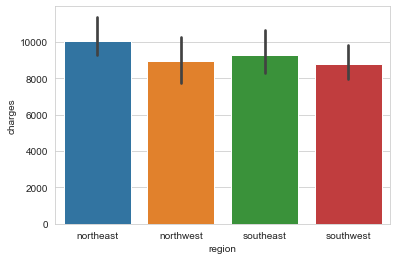

In [77]:
sns.barplot(x='region',y='charges',data=df, estimator=np.median)

## Heatmap of Medical data:
***shows the correlation coefficients between many variables.*** Looking at the heat map below we can see the correlation between all of the varibles in the data. We can see that all of the correlations are postive because if we compare cost to the number of children and bmi it means that the cost will be higher if you have more children and a higher bmi.

<AxesSubplot:>

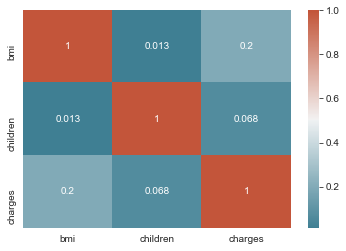

In [78]:
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))